In [1]:
%matplotlib inline

In [18]:
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
data_dir = '/home/julia/data/gradients/'

In [4]:
pcs = np.load(data_dir+'results/pca/pca_components.npy')
var_ratio = np.load(data_dir+'results/pca/explained_variance_ratio.npy')

In [11]:
mask = np.array(nb.load(data_dir + 'allen_atlas/cortex_mask_tight_200um.nii.gz').dataobj)
template_img = nb.load(data_dir + 'allen_atlas/template_200um.nii.gz')
template = np.array(template_img.dataobj)
aff = template_img.affine
hdr = template_img.header

### Plot explained variance ratio

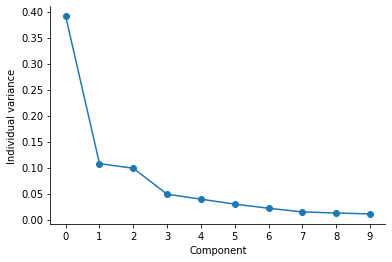

In [9]:
plt.plot(var_ratio[:10], 'o', linestyle="-")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Component')
plt.ylabel('Individual variance') 
sns.despine()

### Plot first 6 components as images

In [12]:
pca_img = np.zeros((mask.shape[0], mask.shape[1], mask.shape[2], 6))
for p in range(6):
    pca_img[:,:,:,p][mask==1] = pcs[:,p]
nb.save(nb.Nifti1Image(pca_img, aff, hdr), data_dir + 'results/pca/pca_img.nii.gz')

In [14]:
x=30
y=12
z=20

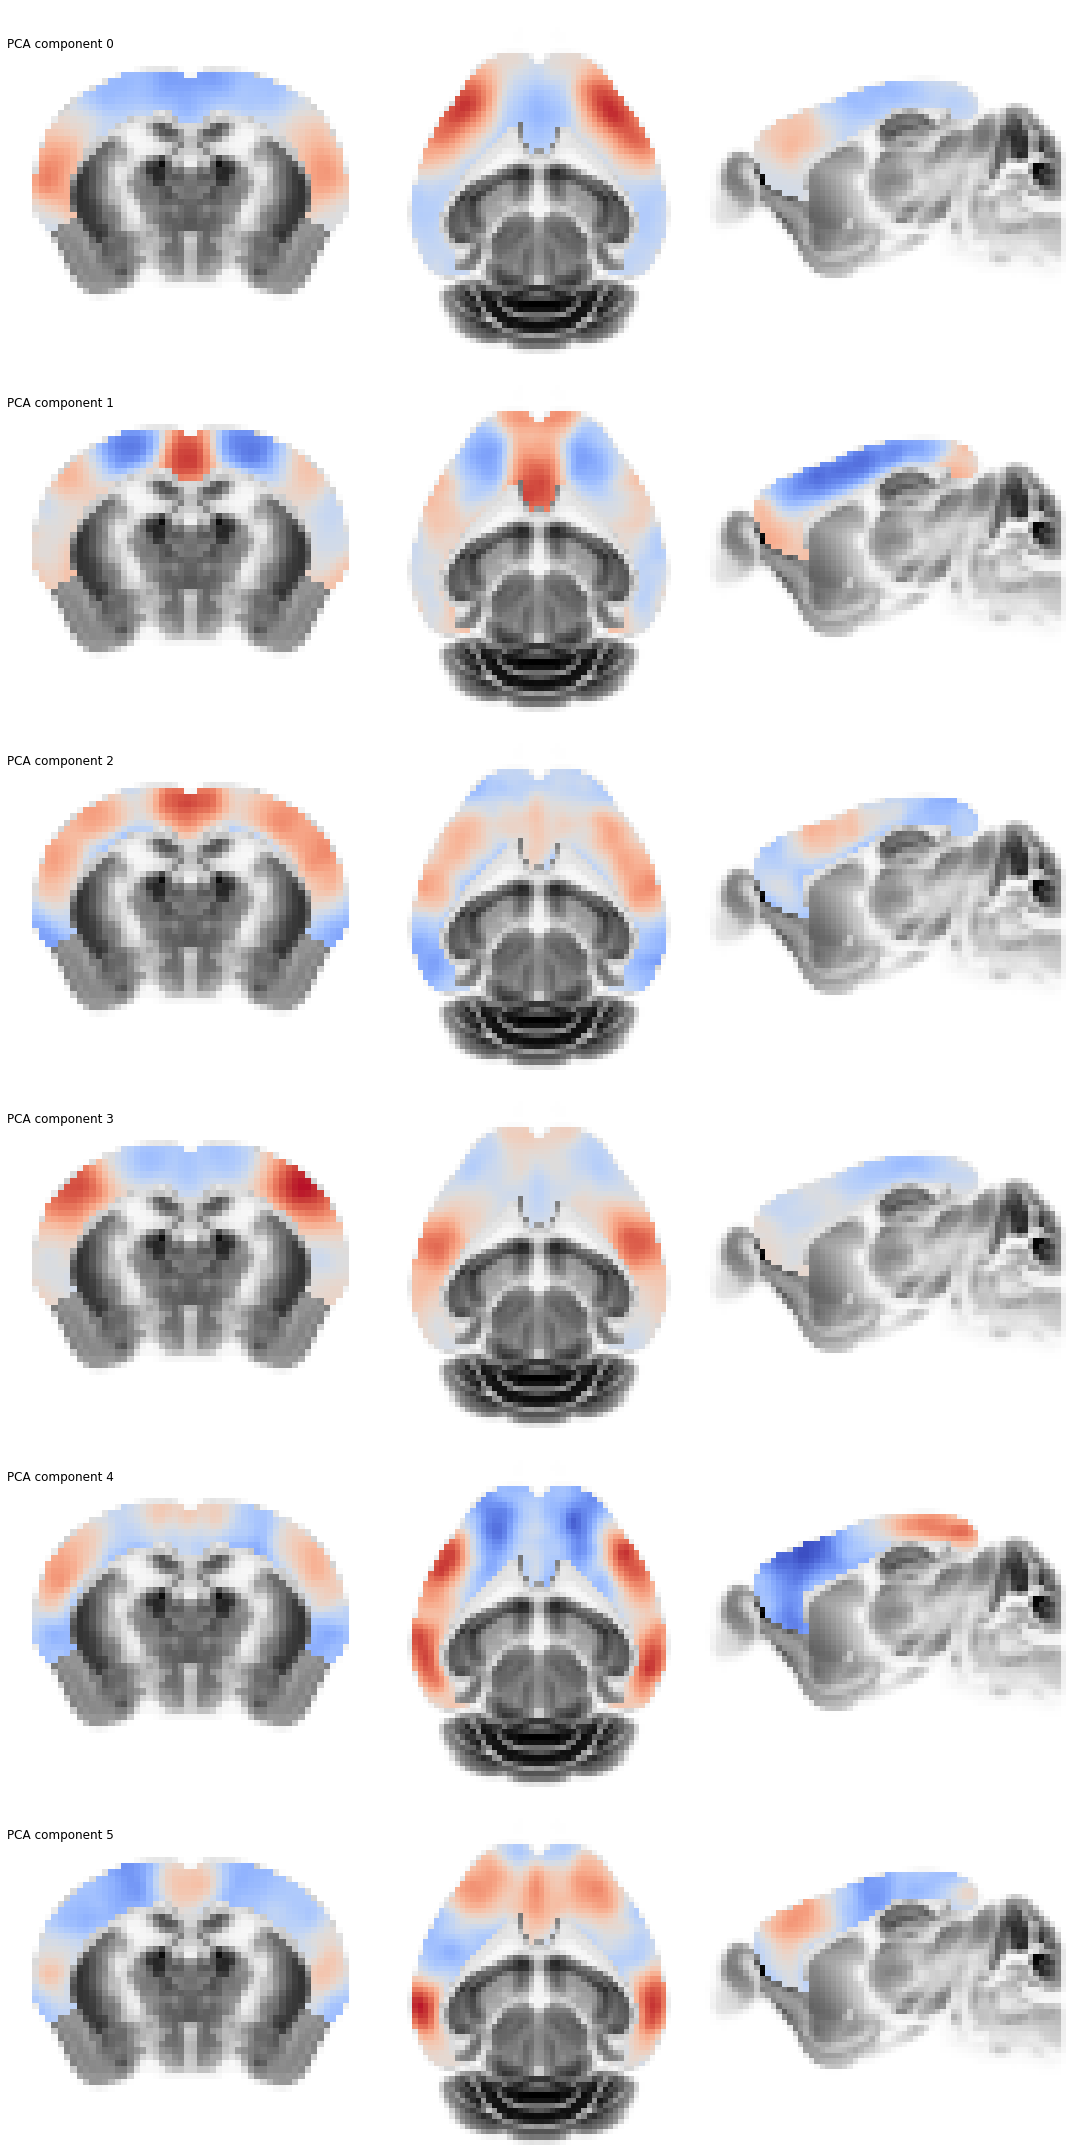

In [15]:
fig = plt.figure(figsize=(15,30))
for g in range(6):
    
    gradient = pca_img[:,:,:,g]
    gradient[mask==0] = np.nan
    vmax = np.max([np.abs(np.nanmin(gradient)), np.abs(np.nanmax(gradient))])
    vmin = -vmax
    
    template_img = [template[x,:,:], template[:,y,:], template[:,:,z].T]
    gradient_img = [gradient[x,:,:], gradient[:,y,:], gradient[:,:,z].T]
    
    for i in range(3):
        
        fig.add_subplot(6,3,(g*3+(i+1)))
        plt.imshow(template_img[i],  cmap='Greys', aspect='equal');
        plt.imshow(gradient_img[i],  cmap="coolwarm", aspect='equal', vmin=vmin, vmax=vmax);
        if i == 0:
            plt.title('PCA component %s' %g, loc='left')
        plt.axis('off');

plt.tight_layout()

### Correlate PCA components with Embedding components

In [16]:
gradients = np.load(data_dir + 'results/embedding/embed.npy')[:,:6]

In [23]:
for g in range(6):
    for p in range(6):
        rval, pval = stats.spearmanr(gradients[:,g], pcs[:,p])
        print("Gradient {} / PCA {}: {:.2f}, {:.2f}".format(g,p,rval,pval))
    print()

Gradient 0 / PCA 0: -1.00, 0.00
Gradient 0 / PCA 1: -0.08, 0.00
Gradient 0 / PCA 2: 0.09, 0.00
Gradient 0 / PCA 3: -0.13, 0.00
Gradient 0 / PCA 4: 0.15, 0.00
Gradient 0 / PCA 5: -0.01, 0.10

Gradient 1 / PCA 0: 0.07, 0.00
Gradient 1 / PCA 1: 0.93, 0.00
Gradient 1 / PCA 2: 0.29, 0.00
Gradient 1 / PCA 3: -0.01, 0.23
Gradient 1 / PCA 4: -0.03, 0.00
Gradient 1 / PCA 5: -0.05, 0.00

Gradient 2 / PCA 0: -0.04, 0.00
Gradient 2 / PCA 1: -0.29, 0.00
Gradient 2 / PCA 2: 0.90, 0.00
Gradient 2 / PCA 3: -0.01, 0.36
Gradient 2 / PCA 4: -0.16, 0.00
Gradient 2 / PCA 5: -0.17, 0.00

Gradient 3 / PCA 0: 0.12, 0.00
Gradient 3 / PCA 1: 0.05, 0.00
Gradient 3 / PCA 2: -0.24, 0.00
Gradient 3 / PCA 3: 0.96, 0.00
Gradient 3 / PCA 4: 0.12, 0.00
Gradient 3 / PCA 5: 0.11, 0.00

Gradient 4 / PCA 0: 0.17, 0.00
Gradient 4 / PCA 1: 0.08, 0.00
Gradient 4 / PCA 2: -0.13, 0.00
Gradient 4 / PCA 3: 0.22, 0.00
Gradient 4 / PCA 4: -0.93, 0.00
Gradient 4 / PCA 5: 0.36, 0.00

Gradient 5 / PCA 0: -0.05, 0.00
Gradient 5 / PCA 1

In [20]:
pcs.shape

(15422, 100)